<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Subheader and Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .subheader {
      max-width: 800px;
      margin: 40px auto 20px;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 10px 20px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 8px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 15px rgba(150, 255, 255, 0.6);
      text-align: center;
      font-size: 2rem;
      font-weight: 600;
      animation: gradientShift 6s ease-in-out infinite;
    }

     @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

  

    @media (max-width: 768px) {
      .subheader {
        margin: 20px 20px 10px;
        padding: 8px 15px;
        font-size: 1.5rem;
      }

    }
  </style>
</head>
<body>
  <h2 class="subheader">Flight Fare Prediction</h2>
  
</body>
</html>

<h2 style="font-family: Poppins, sans-serif; font-size: 2rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
  Importing libraries
</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_excel(r'C:\Users\LOQ\OneDrive\Desktop\Flight_Fare_Prediction1\data\Data_Train.xlsx')

<h2 style="font-family: Poppins, sans-serif; font-size: 2rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
  Data cleaning
</h2>

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [9]:
df.describe(include="O").T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(220)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(10462, 11)

<h2 style="font-family: Poppins, sans-serif; font-size: 2rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
 Data Preproceesing
</h2>

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])


C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\1883159462.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])


In [18]:
df["Journey_Day"] = df["Date_of_Journey"].dt.day


In [19]:
df["Journey_Month"] = df["Date_of_Journey"].dt.month


In [20]:
df["Journey_DOW"] = df["Date_of_Journey"].dt.dayofweek


In [21]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Journey_Day      10462 non-null  int32 
 11  Journey_Month    10462 non-null  int32 
 12  Journey_DOW      10462 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 1021.7+ KB


In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_DOW
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [24]:
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour


C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\1811493405.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour


In [25]:
df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute


C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\3222544692.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute


In [26]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour


C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\1154790724.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour


In [27]:
df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\1189425436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [28]:
df.drop("Dep_Time",axis=1,inplace=True)
df.drop("Arrival_Time",axis=1,inplace=True)


In [29]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,4,16,50,21,35


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Journey_Day      10462 non-null  int32 
 9   Journey_Month    10462 non-null  int32 
 10  Journey_DOW      10462 non-null  int32 
 11  Dep_Hour         10462 non-null  int32 
 12  Dep_Minute       10462 non-null  int32 
 13  Arrival_Hour     10462 non-null  int32 
 14  Arrival_Minute   10462 non-null  int32 
dtypes: int32(7), int64(2), object(6)
memory usage: 1021.7+ KB


In [32]:
df.Total_Stops.value_counts()


Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [33]:
df["Total_Stops"] = df["Total_Stops"].replace({"non-stop" :0, "1 stop" : 1,"2 stops" : 2,"3 stops" : 3,"4 stops" : 4})


C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\3074622131.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"] = df["Total_Stops"].replace({"non-stop" :0, "1 stop" : 1,"2 stops" : 2,"3 stops" : 3,"4 stops" : 4})


In [34]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,4,16,50,21,35


In [35]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [36]:
df.drop("Additional_Info",axis=1,inplace=True)

In [37]:
df["Airline"].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()


In [39]:
df["Airline"] = le.fit_transform(df["Airline"])
airline_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping:", airline_mapping)


Mapping: {'Air Asia': np.int64(0), 'Air India': np.int64(1), 'GoAir': np.int64(2), 'IndiGo': np.int64(3), 'Jet Airways': np.int64(4), 'Jet Airways Business': np.int64(5), 'Multiple carriers': np.int64(6), 'Multiple carriers Premium economy': np.int64(7), 'SpiceJet': np.int64(8), 'Trujet': np.int64(9), 'Vistara': np.int64(10), 'Vistara Premium economy': np.int64(11)}


In [40]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,3,Banglore,New Delhi,BLR → DEL,170,0,3897,24,3,6,22,20,1,10
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,5,2,5,50,13,15
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,6,6,9,25,4,25
3,3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,12,5,6,18,5,23,30
4,3,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1,3,4,16,50,21,35


In [41]:
df["Source"].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [42]:
df["Destination"].value_counts()


Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [43]:
df['Source'] = le.fit_transform(df['Source'])
source_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping:", source_mapping)



Mapping: {'Banglore': np.int64(0), 'Chennai': np.int64(1), 'Delhi': np.int64(2), 'Kolkata': np.int64(3), 'Mumbai': np.int64(4)}


In [44]:
df['Destination'] = le.fit_transform(df['Destination'])
Destination_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping:", Destination_mapping)

Mapping: {'Banglore': np.int64(0), 'Cochin': np.int64(1), 'Delhi': np.int64(2), 'Hyderabad': np.int64(3), 'Kolkata': np.int64(4), 'New Delhi': np.int64(5)}


In [45]:
df.drop(['Route'],axis=1,inplace=True)

In [46]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,3,0,5,170,0,3897,24,3,6,22,20,1,10
1,1,3,0,445,2,7662,1,5,2,5,50,13,15
2,4,2,1,1140,2,13882,9,6,6,9,25,4,25
3,3,3,0,325,1,6218,12,5,6,18,5,23,30
4,3,0,5,285,1,13302,1,3,4,16,50,21,35


<h2 style="font-family: Poppins, sans-serif; font-size: 2rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
 EDA
</h2>

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }

    @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
      insights gained:
      More than 1500 passenger's are travelling on Monday, Wednesday, Thrusday, and Saturday day of week.
      Very less number of passenger's are travelling during Tuesday or Friday day of week.
    </p>
  </div>
</body>
</html>

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\1577056956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


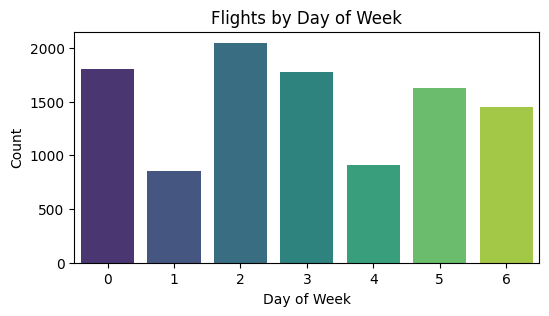

In [47]:
plt.figure(figsize=(6,3))
sns.countplot(
    x="Journey_DOW",
    data=df,
    palette=sns.color_palette("viridis", df["Journey_DOW"].nunique())  # unique colors
)
plt.title("Flights by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }


    @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
       Insights of Month:
      More than 3000 passenger's are travelling during May and June months.
      Very less number of passneger's are travelling during April month as compared to other months
    </p>
  </div>
</body>
</html>

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\861633102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


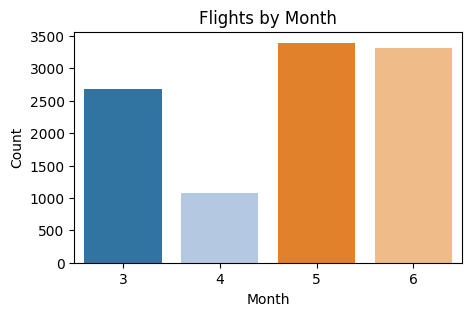

In [48]:
plt.figure(figsize=(5,3))
sns.countplot(
    x="Journey_Month",
    data=df,
    palette=sns.color_palette("tab20", df["Journey_Month"].nunique())  # unique colors
)
plt.title("Flights by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }
     @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
       Insights for Total stops:
       0 Stop, 1 Stop has highest frequency than all the other stops. So ,we can say that most passenger are preferring 1 stop.
       We can clearly see that 3 and 4 stops has very less frequency. So ,we can say that as the stops is increasing number of passenger is decreasing.
</p>

  </div>
</body>
</html>
    

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\2038868722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


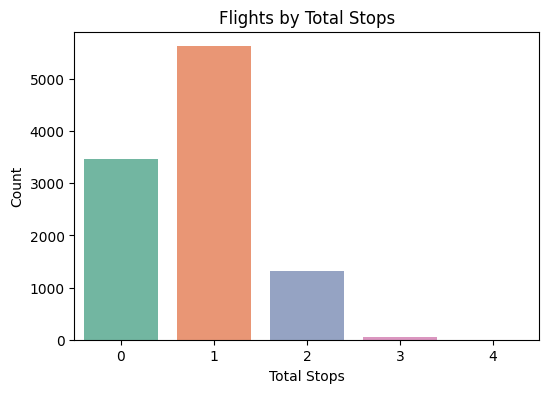

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="Total_Stops",
    data=df,
    palette=sns.color_palette("Set2", df["Total_Stops"].nunique())  # unique colors
)
plt.title("Flights by Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Count")
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }
     @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
       Insights for Destination:
       More than 4000 passenger has Cochin as their destination. Also, frequency for Cochin is highest compared to other Destination.
       Very less passenger has Kolkata as their destination.
</p>

  </div>
</body>
</html>
    

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\689938854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


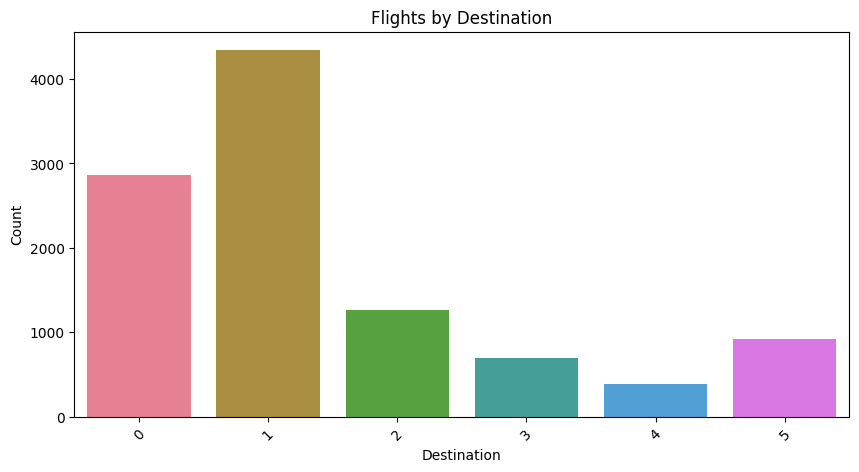

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(
    x="Destination",
    data=df,
    palette=sns.color_palette("husl", df["Destination"].nunique())  # unique color per destination
)
plt.title("Flights by Destination")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.xticks(rotation=45)  # rotate x labels so they don't overlap
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }
     @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
       Insight of Price:
       Mostly it is right skewed.
Average Price for a flight is aorund 9,000 rupees
Very few passenger are paying more than 20,000 rupees
The majority of passengers pay relatively low to mid prices.

A small minority pay very high prices (20,000–80,000 rupees), but these are rare outliers.
</p>

  </div>
</body>
</html>

<Axes: xlabel='Price', ylabel='Count'>

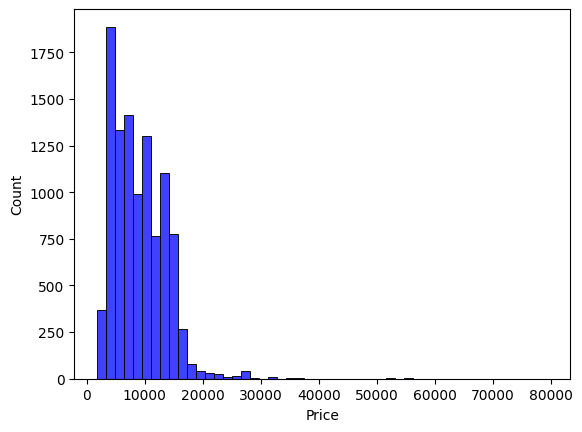

In [51]:
sns.histplot(data=df, x="Price",bins=50,color='blue')

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }
     @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
       Insights for Airline:
       Jet Airways Business is costliest compared to all the other airline ranging from 50,000 to 60,000 rupees.
       Highest price for a airlins is also Jet Airways Business having Price of around 80,000.
       Less number of passenger are travelling in Trujet.
       Most of the Airline has Price between 5,000 to 15,000 rupees.
</p>

  </div>
</body>
</html>

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\685216910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


<Figure size 1200x600 with 0 Axes>

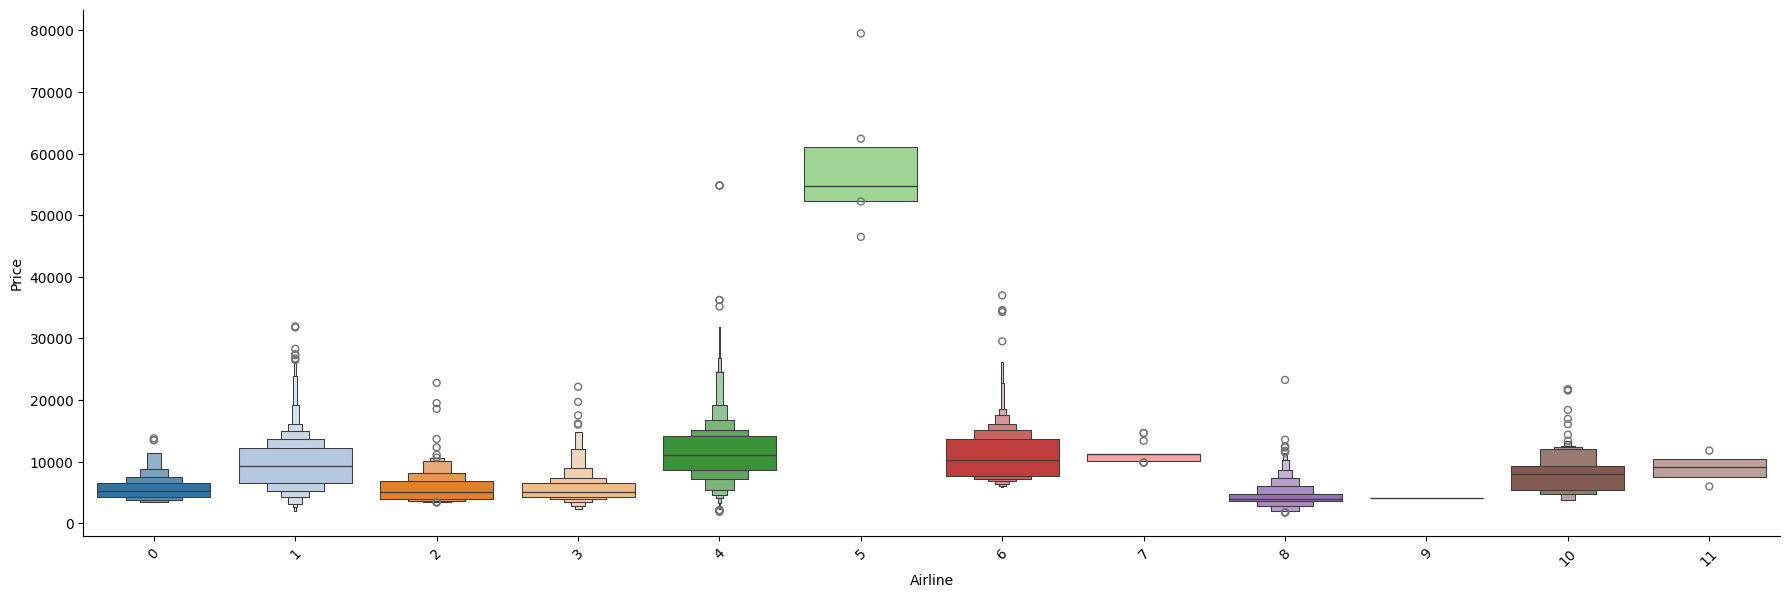

In [52]:
plt.figure(figsize=(12,6))
sns.catplot(
    y="Price",
    x="Airline",
    data=df.sort_values("Price", ascending=False),
    kind="boxen",
    height=6,
    aspect=3,
    palette="tab20"   
)
plt.xticks(rotation=45)
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }
     @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
      Insights for Price by Source:
       People who are taking flight from Banglore are paying more than other source's.
      Some passenger are paying around 80,000 rupees from Banglore .
</p>

  </div>
</body>
</html>

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\2337114997.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


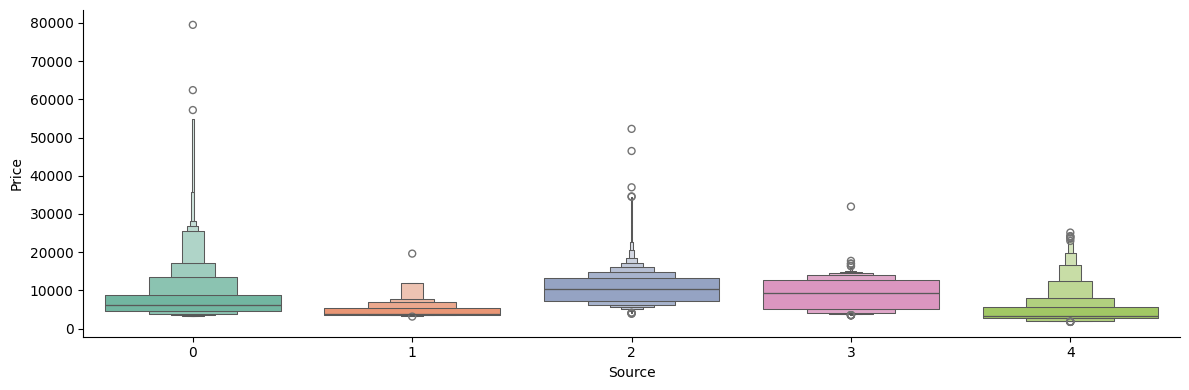

In [53]:
sns.catplot(
    y="Price",
    x="Source",
    data=df.sort_values("Price", ascending=False),
    kind="boxen",
    height=4,
    aspect=3,
    palette="Set2"   
)
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Neon Glow Animated Content Box</title>
  <style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }

    body {
      font-family: "Poppins", sans-serif;
      background: #000000;
    }

    .content-box {
      max-width: 800px;
      margin: 40px auto;
      background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6));
      color: white;
      padding: 25px;
      border: 2px solid rgba(255, 255, 255, 0.5);
      border-radius: 12px;
      backdrop-filter: blur(10px);
      box-shadow: 0 0 25px rgba(150, 255, 255, 0.6);
      animation: gradientShift 6s ease-in-out infinite;
    }
     @keyframes gradientShift {
      0% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
      50% { background: linear-gradient(135deg, rgba(150, 255, 255, 0.6), rgba(200, 255, 200, 0.6)); }
      100% { background: linear-gradient(135deg, rgba(200, 255, 200, 0.6), rgba(150, 255, 255, 0.6)); }
    }

    .content-box p {
      font-size: 1.2rem;
      line-height: 1.6;
    }

    @media (max-width: 768px) {
      .content-box {
        margin: 20px;
        padding: 15px;
      }
    }
  </style>
</head>
<body>
  <div class="content-box">
    <p>
       Insights for Price by Destination:
       Passenger's are paying more for travelling to Delhi as compared to other Destination
</p>

  </div>
</body>
</html>

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31024\3884439315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


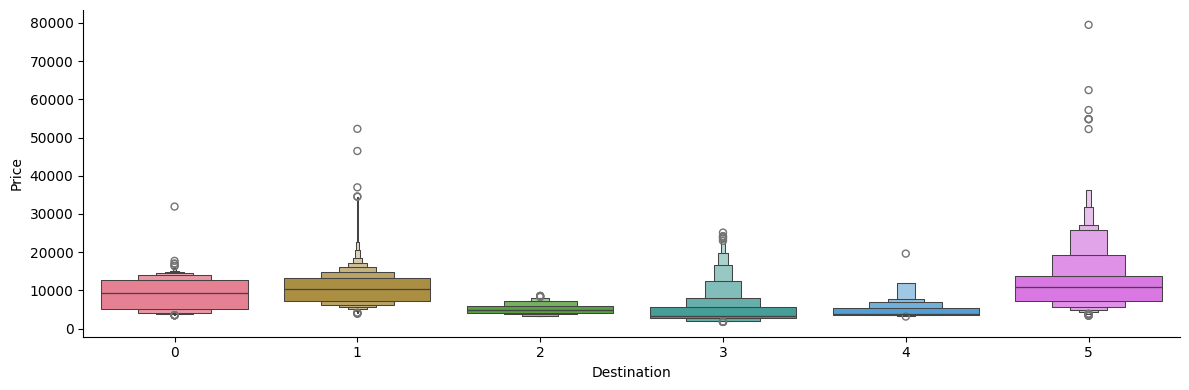

In [54]:
palette = sns.color_palette("husl", len(df["Destination"].unique()))

sns.catplot(
    y="Price",
    x="Destination",
    data=df.sort_values("Price", ascending=False),
    kind="boxen",
    height=4,
    aspect=3,
    palette=palette   
)
plt.show()

<Axes: >

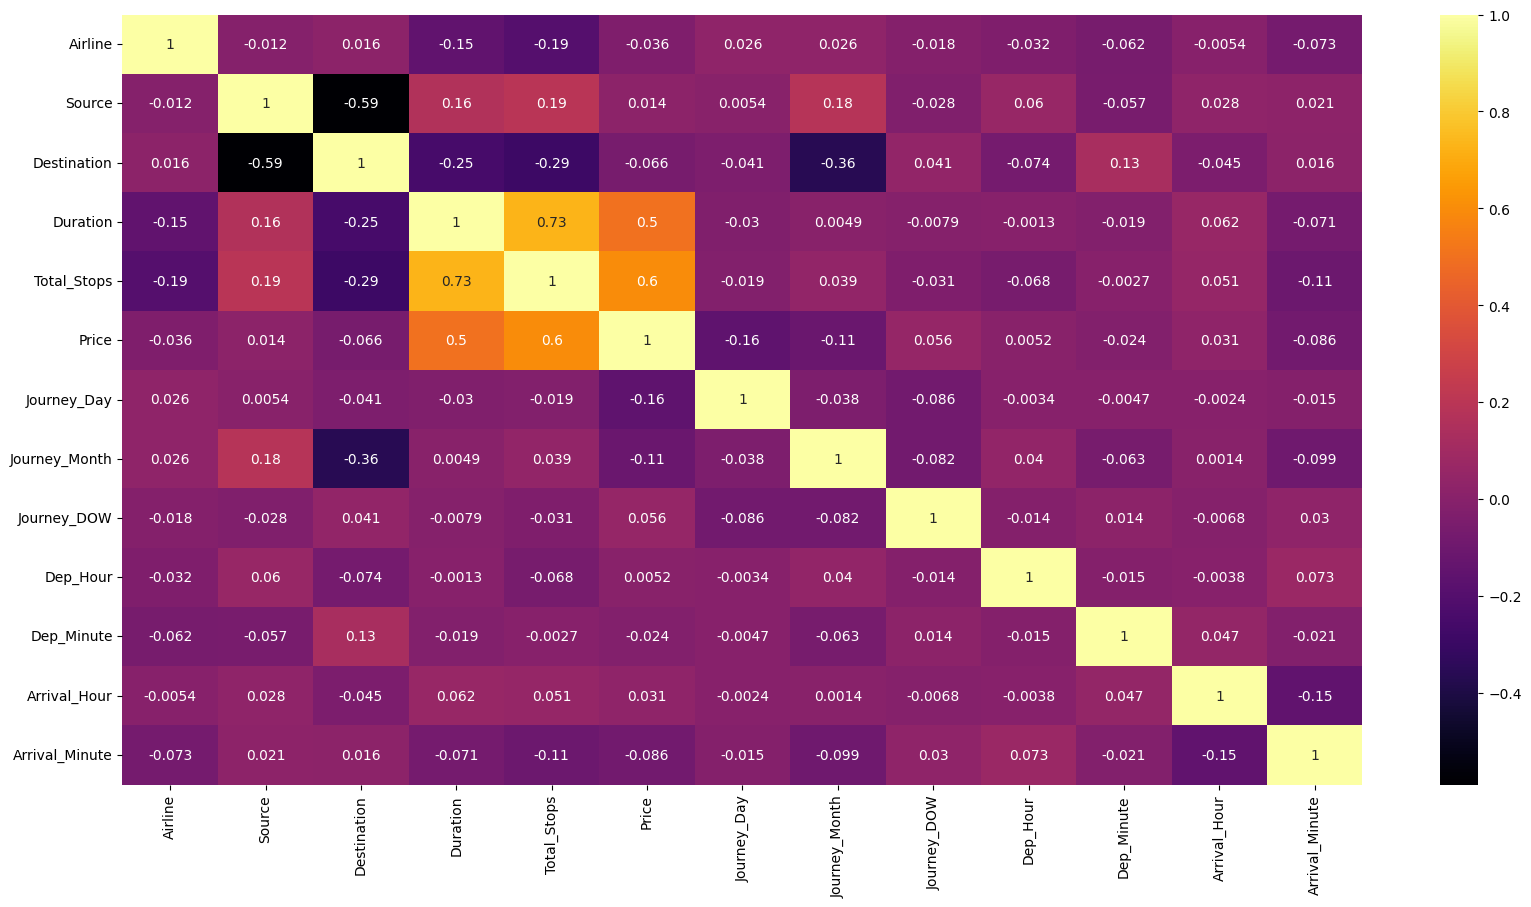

In [55]:
columns = [col for col in df.columns if df[col].nunique()>3]
plt.figure(figsize=(20,10))
sns.heatmap(df[columns].corr(),annot=True,cmap="inferno")

In [56]:
X = df.drop("Price",axis=1)
y = df["Price"]
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
scaler = StandardScaler()
param_grid = {
    "Linear Regression": {
        "pipeline": Pipeline([
            ("scaler", scaler),
            ("model", LinearRegression())
        ]),
        "param": {}
    },
    "Decision Tree": {
        "pipeline": Pipeline([
            ("scaler", "passthrough"),
            ("model", DecisionTreeRegressor())
        ]),
        "param": {
            "model__criterion": ["squared_error", "friedman_mse", "absolute_error"],
            "model__max_depth": [None, 3, 5, 7, 10]
        }
    },
    "Random Forest": {
        "pipeline": Pipeline([
            ("scaler", "passthrough"),
            ("model", RandomForestRegressor())
        ]),
        "param": {
            "model__criterion": ["squared_error", "absolute_error"],
            "model__max_depth": [None, 3, 5, 7, 10],
            "model__max_features": ["sqrt", "log2"],
            "model__n_estimators": [100, 200]
        }
    },
    "SVR": {
        "pipeline": Pipeline([
            ("scaler", scaler),
            ("model", SVR())
        ]),
        "param": {
            "model__C": [0.01, 0.1, 1, 10],
            "model__kernel": ["linear", "rbf"],
            "model__gamma": ["scale", "auto"]
        }
    },
    "KNN": {
        "pipeline": Pipeline([
            ("scaler", scaler),
            ("model", KNeighborsRegressor())
        ]),
        "param": {
            "model__n_neighbors": [2, 3, 5, 10]
        }
    },
    "XGBoost": {
        "pipeline": Pipeline([
            ("scaler", "passthrough"),   # XGBoost handles scaling internally
            ("model", XGBRegressor(objective="reg:squarederror", random_state=42))
        ]),
        "param": {
            "model__n_estimators": [100, 200, 300],
            "model__max_depth": [3, 5, 7, 10],
            "model__learning_rate": [0.01, 0.05, 0.1],
            "model__subsample": [0.8, 1.0],
            "model__colsample_bytree": [0.8, 1.0]
        }
    },
    "Voting": {
        "pipeline": Pipeline([
            ("model", VotingRegressor(
                estimators=[
                    ("Linear Regression", LinearRegression()),
                    ("Decision Tree", DecisionTreeRegressor()),
                    ("Random Forest", RandomForestRegressor()),
                    ("SVR", SVR()),
                    ("KNN", KNeighborsRegressor()),
                    ("XGBoost", XGBRegressor(objective="reg:squarederror", random_state=42))
                ]
            ))
        ]),
        "param": {}
    }
}


In [61]:
best_models = []

for name, mp in param_grid.items():
    grid = GridSearchCV(mp['pipeline'], mp['param'], cv=5, n_jobs=-1, scoring='r2')  
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    best_models.append({
        'Model': name,
        'BestParams': grid.best_params_,
        'R2_Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Best CV Score (R2)': grid.best_score_,
        'BestEstimator': grid.best_estimator_
    })

res_df = pd.DataFrame(best_models)
res_df

,Model,BestParams,R2_Score,MSE,MAE,Best CV Score (R2),BestEstimator
0,Linear Regression,{},0.448116,1.150692e+07,2450.412663,0.431691,"(StandardScaler(), LinearRegression())"
1,Decision Tree,"{'model__criterion': 'squared_error', 'model__...",0.720042,5.837198e+06,1347.055347,0.758618,"(passthrough, DecisionTreeRegressor(max_depth=..."
2,Random Forest,"{'model__criterion': 'absolute_error', 'model_...",0.805574,4.053838e+06,1234.229142,0.803498,"(passthrough, (DecisionTreeRegressor(criterion..."
3,SVR,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.404362,1.241921e+07,2354.327836,0.383619,"(StandardScaler(), SVR(C=10, kernel='linear'))"
4,KNN,{'model__n_neighbors': 5},0.709857,6.049572e+06,1573.675012,0.693483,"(StandardScaler(), KNeighborsRegressor())"
5,XGBoost,"{'model__colsample_bytree': 0.8, 'model__learn...",0.842050,3.293300e+06,1143.255859,0.836602,"(passthrough, XGBRegressor(base_score=None, bo..."
6,Voting,{},0.741716,5.385299e+06,1569.840821,0.736349,(VotingRegressor(estimators=[('Linear Regressi...


In [62]:
import os
from joblib import dump

if not os.path.exists("models"):
    os.makedirs("models")


best_index = res_df['R2_Score'].idxmax()
best_model_name = res_df.loc[best_index, 'Model']
best_estimator = res_df.loc[best_index, 'BestEstimator']


dump(best_estimator, f"models/{best_model_name}_best_model.joblib")
print(f"{best_model_name} saved successfully")



XGBoost saved successfully
